In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN


In [69]:
# 2. Đọc file csv và gắn index với giá Close
df = pd.read_csv('../Dataset/VCB-Historical-Data_Group 9.csv')
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df = df.iloc[::-1] 
df1=df.reset_index()['Price']

In [70]:
df

,Date,Price,Open,High,Low,Vol.,Change %
1251,03/01/2019,47765.0,"46,844","47,765","46,690",910.43K,2.81%
1250,03/04/2019,48226.0,"47,765","48,379","47,765",1.72M,0.97%
1249,03/05/2019,48379.0,"48,226","48,994","47,995",2.01M,0.32%
1248,03/06/2019,48149.0,"48,456","48,610","47,535",1.38M,-0.48%
1247,03/07/2019,48456.0,"48,149","48,994","48,072",2.42M,0.64%
...,...,...,...,...,...,...,...
4,02/26/2024,89500.0,"88,900","90,000","88,900",722.00K,-0.11%
3,02/27/2024,91100.0,"89,600","91,200","89,100",1.60M,1.79%
2,02/28/2024,97400.0,"91,000","97,400","90,400",4.22M,6.92%
1,02/29/2024,97300.0,"98,500","100,500","97,300",1.90M,-0.10%


In [71]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]


In [73]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [74]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [75]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [76]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\Windows 10\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0655 - val_loss: 0.0561
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0067 - val_loss: 0.0219
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0037 - val_loss: 0.0123
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0030 - val_loss: 0.0089
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027 - val_loss: 0.0081
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0025 - val_loss: 0.0061
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024 - val_loss: 0.0055
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - val_loss: 0.0047
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0020 - val_loss: 0.0059
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

In [78]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [79]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [80]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [81]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
# 6. Model evaluation
rmse_value = np.sqrt(np.mean((y_pred - ytest)**2))
mape_value = np.mean(np.abs((ytest - y_pred) / y_pred)) * 100
mae_value = np.mean(np.abs(ytest - y_pred))

print("Mean Absolute Percentage Error (MAPE):", mape_value)
print("Mean Absolute Error (MAE):", mae_value)
print("Root Mean Squared Error (RMSE):", rmse_value)

Mean Absolute Percentage Error (MAPE): 2.194574843695762
Mean Absolute Error (MAE): 1979.4798579545454
Root Mean Squared Error (RMSE): 2539.045847575244


In [82]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[-100:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.66280463 0.65001998 0.67399121 0.68038354 0.67239313 0.68198162
 0.67399121 0.67079505 0.67079505 0.64842189 0.65321614 0.64842189
 0.67239313 0.66919696 0.64842189 0.65641231 0.67079505 0.68517779
 0.70115861 0.7203356  0.71873751 0.72832601 0.70914902 0.72832601
 0.70275669 0.67239313 0.66440272 0.67239313 0.69956053 0.70435477
 0.6660008  0.67399121 0.68198162 0.6835797  0.66440272 0.67239313
 0.66919696 0.66919696 0.65801039 0.65161806 0.65641231 0.67239313
 0.66280463 0.67079505 0.65960847 0.65641231 0.64362765 0.64362765
 0.63563724 0.64682381 0.611666   0.60047942 0.59568518 0.5940871
 0.59089093 0.59089093 0.60527367 0.62125449 0.61965641 0.62125449
 0.58130244 0.63244107 0.64842189 0.67079505 0.67558929 0.68517779
 0.70115861 0.72832601 0.72512984 0.71554135 0.73631642 0.73631642
 0.75069916 0.75389533 0.77786656 0.76827807 0.76028765 0.75389533
 0.75229724 0.76827807 0.75549341 0.75229724 0.71234519 0.73312026
 0.74111067 0.73631642 0.72832601 0.73631642 0.7347

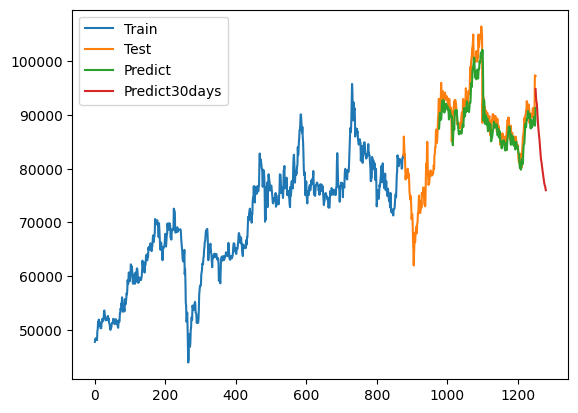

In [99]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size+1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size+1, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()